In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

from functions_task10 import*

In [6]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/X_ray/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

#creating the sets
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/5780 of train images
Reading: 100/5780 of train images
Reading: 200/5780 of train images
Reading: 300/5780 of train images
Reading: 400/5780 of train images
Reading: 500/5780 of train images
Reading: 600/5780 of train images
Reading: 700/5780 of train images
Reading: 800/5780 of train images
Reading: 900/5780 of train images
Reading: 1000/5780 of train images
Reading: 1100/5780 of train images
Reading: 1200/5780 of train images
Reading: 1300/5780 of train images
Reading: 1400/5780 of train images
Reading: 1500/5780 of train images
Reading: 1600/5780 of train images
Reading: 1700/5780 of train images
Reading: 1800/5780 of train images
Reading: 1900/5780 of train images
Reading: 2000/5780 of train images
Reading: 2100/5780 of train images
Reading: 2200/5780 of train images
Reading: 2300/5780 of train images
Reading: 2400/5780 of train images
Reading: 2500/5780 of train images
Reading: 2600/5780 of train images
Reading: 2700/5780 of train images
Reading: 2800/5780 of train imag

In [49]:
#data
n_epochs=200
batch_size=8
base_dense=8
lr=0.00001
loss_function='sparse_categorical_crossentropy'
opt=Adam(lr)
dr=0.2

In [50]:
def Lenet_model(img_ch, img_width, img_height):
    
    model = Sequential()
    model.add(Conv2D(base_dense, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same',
    input_shape = (img_width, img_height, img_ch)))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(base_dense*2, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(base_dense*2, activation='relu'))
    #model.add(Dropout(dr))
    
    model.add(Dense(9, activation='softmax'))
    #model.add(Dropout(dr))

    model.summary()

    return model

In [51]:
def Alex_model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(filters=base_dense, input_shape=(img_width, img_height, img_ch),
    kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten()) 
    model.add(Dense(128))
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64)) 
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    model.add(Dense(9))
    model.add(Dropout(dr))
    model.add(Activation('softmax'))
    model.summary() 
    return model

In [54]:
clf=Alex_model(np.shape(x_train)[3],img_w,img_h)
clf.compile(loss=loss_function,optimizer = opt,metrics=['sparse_categorical_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation (Activation)      (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)       

5780/5780 [==============================] - 5s 884us/sample - loss: 0.4960 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.3367 - val_sparse_categorical_accuracy: 0.9044
Epoch 27/200
5780/5780 [==============================] - 5s 816us/sample - loss: 0.4998 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.9044
Epoch 28/200
5780/5780 [==============================] - 6s 974us/sample - loss: 0.4731 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.3438 - val_sparse_categorical_accuracy: 0.9000
Epoch 29/200
5780/5780 [==============================] - 6s 1ms/sample - loss: 0.4743 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.3468 - val_sparse_categorical_accuracy: 0.9000
Epoch 30/200
5780/5780 [==============================] - 5s 864us/sample - loss: 0.4750 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3811 - val_sparse_categorical_accuracy: 0.8733
Epoch 31/200
5780/5780 [==============================] - 6s 1ms/sample - l

Epoch 70/200
5780/5780 [==============================] - 6s 981us/sample - loss: 0.3656 - sparse_categorical_accuracy: 0.8829 - val_loss: 0.2525 - val_sparse_categorical_accuracy: 0.9200
Epoch 71/200
5780/5780 [==============================] - 5s 905us/sample - loss: 0.3699 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.2274 - val_sparse_categorical_accuracy: 0.9289
Epoch 72/200
5780/5780 [==============================] - 5s 821us/sample - loss: 0.3529 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.2079 - val_sparse_categorical_accuracy: 0.9267
Epoch 73/200
5780/5780 [==============================] - 5s 937us/sample - loss: 0.3499 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.1970 - val_sparse_categorical_accuracy: 0.9311
Epoch 74/200
5780/5780 [==============================] - 5s 935us/sample - loss: 0.3720 - sparse_categorical_accuracy: 0.8789 - val_loss: 0.2287 - val_sparse_categorical_accuracy: 0.9244
Epoch 75/200
5780/5780 [==============================] - 5s

5780/5780 [==============================] - 6s 979us/sample - loss: 0.3121 - sparse_categorical_accuracy: 0.8946 - val_loss: 0.1880 - val_sparse_categorical_accuracy: 0.9333
Epoch 114/200
5780/5780 [==============================] - 5s 916us/sample - loss: 0.2996 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.2165 - val_sparse_categorical_accuracy: 0.9333
Epoch 115/200
5780/5780 [==============================] - 6s 969us/sample - loss: 0.3107 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.2149 - val_sparse_categorical_accuracy: 0.9333
Epoch 116/200
5780/5780 [==============================] - 5s 938us/sample - loss: 0.2999 - sparse_categorical_accuracy: 0.9047 - val_loss: 0.2181 - val_sparse_categorical_accuracy: 0.9311
Epoch 117/200
5780/5780 [==============================] - 5s 919us/sample - loss: 0.3038 - sparse_categorical_accuracy: 0.8998 - val_loss: 0.2210 - val_sparse_categorical_accuracy: 0.9289
Epoch 118/200
5780/5780 [==============================] - 6s 967us/s

5780/5780 [==============================] - 5s 840us/sample - loss: 0.2603 - sparse_categorical_accuracy: 0.9144 - val_loss: 0.1984 - val_sparse_categorical_accuracy: 0.9356
Epoch 157/200
5780/5780 [==============================] - 5s 827us/sample - loss: 0.2610 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.1830 - val_sparse_categorical_accuracy: 0.9489
Epoch 158/200
5780/5780 [==============================] - 5s 821us/sample - loss: 0.2712 - sparse_categorical_accuracy: 0.9047 - val_loss: 0.1809 - val_sparse_categorical_accuracy: 0.9467
Epoch 159/200
5780/5780 [==============================] - 6s 971us/sample - loss: 0.2761 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2482 - val_sparse_categorical_accuracy: 0.9311
Epoch 160/200
5780/5780 [==============================] - 5s 844us/sample - loss: 0.2563 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.1927 - val_sparse_categorical_accuracy: 0.9444
Epoch 161/200
5780/5780 [==============================] - 5s 895us/s

5780/5780 [==============================] - 5s 909us/sample - loss: 0.2519 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.1891 - val_sparse_categorical_accuracy: 0.9511
Epoch 200/200
5780/5780 [==============================] - 5s 941us/sample - loss: 0.2409 - sparse_categorical_accuracy: 0.9190 - val_loss: 0.1835 - val_sparse_categorical_accuracy: 0.9467


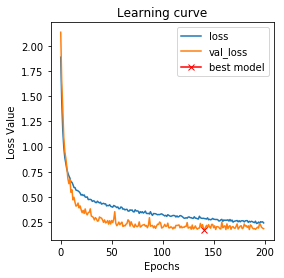

In [55]:
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

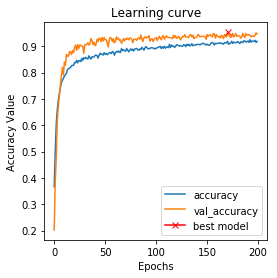

In [56]:
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.plot( np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
 np.max(clf_hist.history["val_sparse_categorical_accuracy"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend();